In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data


In [4]:
pip install yfinance


In [6]:
import yfinance as yf

start = '2012-01-01'
end = '2022-07-30'

df = yf.download('AAPL', start=start, end=end)
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466091,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533086,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672229,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804703,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784389,394024400


In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-25,154.009995,155.039993,152.279999,152.949997,151.837082,53623900
2022-07-26,152.259995,153.089996,150.800003,151.600006,150.496918,55138700
2022-07-27,152.580002,157.330002,152.160004,156.789993,155.649124,78620700
2022-07-28,156.979996,157.639999,154.410004,157.350006,156.205093,81378700
2022-07-29,161.240005,163.630005,159.500000,162.509995,161.327515,101786900


In [9]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466091,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533086,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672229,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804703,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784389,394024400


In [12]:
df=df.drop(['Date','Adj Close'], axis=1)

In [13]:
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


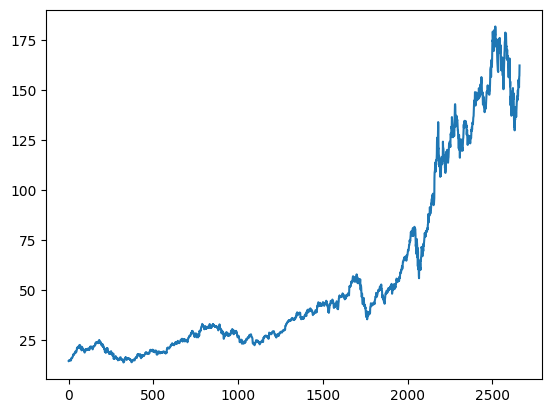

In [14]:
plt.plot(df.Close)

In [15]:
df

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400
...,...,...,...,...,...
2656,154.009995,155.039993,152.279999,152.949997,53623900
2657,152.259995,153.089996,150.800003,151.600006,55138700
2658,152.580002,157.330002,152.160004,156.789993,78620700
2659,156.979996,157.639999,154.410004,157.350006,81378700


In [16]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2656    153.9333
2657    153.7837
2658    153.6893
2659    153.6311
2660    153.6632
Name: Close, Length: 2661, dtype: float64

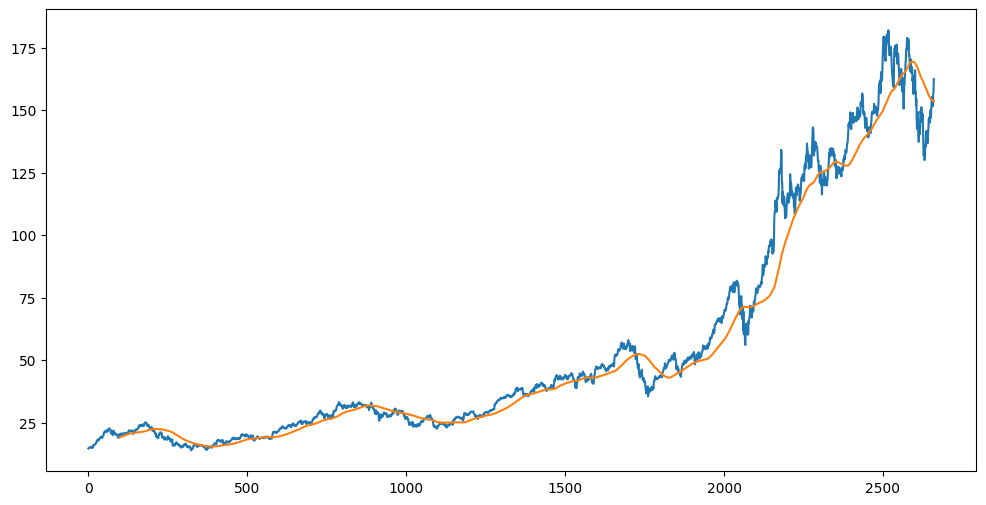

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100)

In [20]:
ma200 = df.Close.rolling(100).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2656    153.9333
2657    153.7837
2658    153.6893
2659    153.6311
2660    153.6632
Name: Close, Length: 2661, dtype: float64

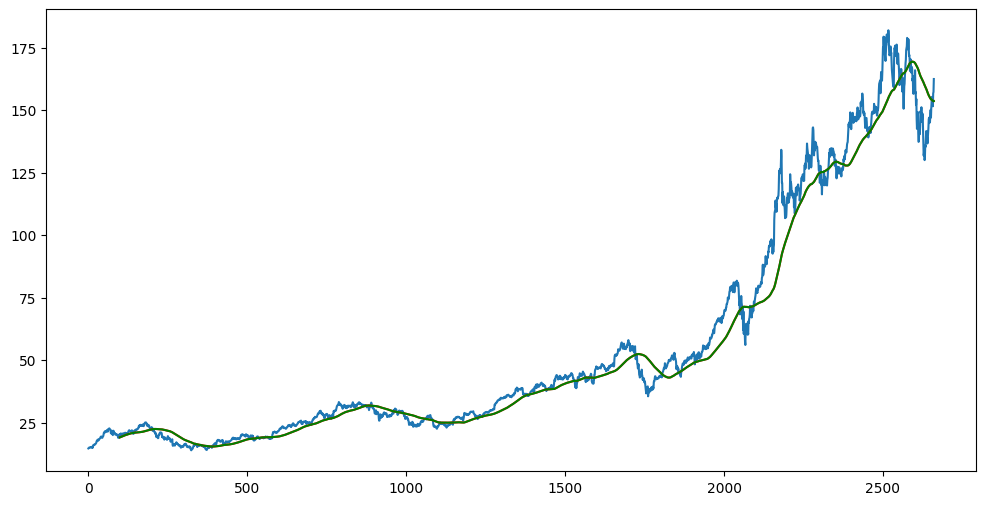

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [25]:
df.shape

(2661, 5)

In [29]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1862, 1)
(799, 1)


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [33]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.69877465],
       [0.69457675],
       [0.68975493]])

In [34]:
data_training_array.shape

(1862, 1)

In [37]:
x_train= []
y_train= []

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append (data_training_array[i,0])

x_train, y_train = np.array (x_train), np.array(y_train)

In [39]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [41]:
model = Sequential()

model.add(LSTM(units=50, activation = 'relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [43]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs= 50)

Epoch 1/50
56/56 [==============================] - 26s 356ms/step - loss: 0.0303
Epoch 2/50
56/56 [==============================] - 19s 332ms/step - loss: 0.0098
Epoch 3/50
56/56 [==============================] - 21s 369ms/step - loss: 0.0071
Epoch 4/50
56/56 [==============================] - 19s 341ms/step - loss: 0.0063
Epoch 5/50
56/56 [==============================] - 20s 354ms/step - loss: 0.0054
Epoch 6/50
56/56 [==============================] - 21s 376ms/step - loss: 0.0061
Epoch 7/50
56/56 [==============================] - 19s 344ms/step - loss: 0.0069
Epoch 8/50
56/56 [==============================] - 18s 330ms/step - loss: 0.0053
Epoch 9/50
56/56 [==============================] - 21s 380ms/step - loss: 0.0056
Epoch 10/50
56/56 [==============================] - 19s 340ms/step - loss: 0.0051
Epoch 11/50
56/56 [==============================] - 20s 355ms/step - loss: 0.0057
Epoch 12/50
56/56 [==============================] - 19s 334ms/step - loss: 0.0041
Epoch 13/50
5

In [44]:
  model.save('stockanalyzer.h5')

In [45]:
data_testing.head()

,Close
1862,44.575001
1863,43.767502
1864,43.325001
1865,44.910000
1866,45.634998


In [46]:
data_training.tail()

,Close
1857,45.695000
1858,44.915001
1859,44.742500
1860,44.557499
1861,44.345001


In [47]:
past_100_days = data_training.tail(100)

In [48]:
final_df = past_100_days.append(data_testing, ignore_index=True)

<ipython-input-48-27e824f269e9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [49]:
final_df.head()

,Close
0,37.064999
1,36.982498
2,37.687500
3,38.327499
4,38.450001


In [50]:
input_data = scaler.fit_transform(final_df)

In [51]:
input_data

array([[5.68860801e-04],
       [0.00000000e+00],
       [4.86115977e-03],
       [9.27411184e-03],
       [1.01187887e-02],
       [7.51581721e-03],
       [3.56830149e-03],
       [8.86041402e-03],
       [1.20839323e-02],
       [1.36698353e-02],
       [1.53247054e-02],
       [9.25688320e-03],
       [1.03256376e-02],
       [8.22258605e-03],
       [1.69450657e-02],
       [1.44283163e-02],
       [1.16357246e-02],
       [2.98564199e-02],
       [3.19077593e-02],
       [3.20456673e-02],
       [4.01992862e-02],
       [4.52500399e-02],
       [4.53534907e-02],
       [3.96649090e-02],
       [3.87512912e-02],
       [3.70619375e-02],
       [3.95787132e-02],
       [3.83547957e-02],
       [3.94235765e-02],
       [3.87685199e-02],
       [3.96476540e-02],
       [4.15438567e-02],
       [3.98717579e-02],
       [4.31642433e-02],
       [4.53362357e-02],
       [4.55086274e-02],
       [4.64394738e-02],
       [4.34745167e-02],
       [4.66118654e-02],
       [4.81288275e-02],


In [52]:
input_data.shape

(899, 1)

In [63]:
x_test =[]

In [64]:
y_test=[]

In [65]:
for i in range (100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [66]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [67]:
print(x_test.shape)
print(y_test.shape)

(799, 100, 1)
(799,)


In [68]:
y_predicted = model.predict(x_test)

25/25 [==============================] - 5s 148ms/step


In [69]:
y_predicted.shape

(799, 1)

In [70]:
y_test

array([0.05235216, 0.04678426, 0.0437331 , 0.05466206, 0.0596611 ,
       0.06428093, 0.0727793 , 0.07696818, 0.08081227, 0.07974352,
       0.07967455, 0.077244  , 0.07922637, 0.08708694, 0.08608713,
       0.08882801, 0.0876558 , 0.08731105, 0.08212238, 0.0894141 ,
       0.08931067, 0.08617332, 0.09243077, 0.09446485, 0.09736087,
       0.09705057, 0.08979334, 0.09189639, 0.09532676, 0.09277552,
       0.09544744, 0.09873992, 0.097516  , 0.09553363, 0.09951563,
       0.09422352, 0.10220477, 0.10499734, 0.10470429, 0.10186001,
       0.10310116, 0.10644533, 0.10489391, 0.11223734, 0.10429057,
       0.09668858, 0.07827827, 0.08458742, 0.08810398, 0.09567151,
       0.09146544, 0.09058628, 0.10522144, 0.09449933, 0.09275829,
       0.10096363, 0.10760031, 0.10761754, 0.11154782, 0.11123755,
       0.09430971, 0.1009464 , 0.09692991, 0.09929153, 0.10529038,
       0.10482497, 0.09958457, 0.10560068, 0.11265106, 0.11261658,
       0.11418525, 0.11854649, 0.13042355, 0.12956164, 0.12208

In [71]:
y_predicted

array([[0.141801  ],
       [0.13958839],
       [0.13743   ],
       [0.13534242],
       [0.13336632],
       [0.13155845],
       [0.12998179],
       [0.12870744],
       [0.12779835],
       [0.12730026],
       [0.12722658],
       [0.12755981],
       [0.1282515 ],
       [0.12923941],
       [0.13047259],
       [0.13189787],
       [0.13346633],
       [0.13512686],
       [0.13682756],
       [0.13850597],
       [0.14012085],
       [0.14164346],
       [0.14304581],
       [0.14432195],
       [0.1454815 ],
       [0.1465467 ],
       [0.14754036],
       [0.14846213],
       [0.14930823],
       [0.15008256],
       [0.15078391],
       [0.1514169 ],
       [0.15199628],
       [0.15253481],
       [0.15303677],
       [0.15351272],
       [0.1539585 ],
       [0.15438613],
       [0.15481731],
       [0.15527123],
       [0.15575302],
       [0.1562623 ],
       [0.15680213],
       [0.15736893],
       [0.15797366],
       [0.15860608],
       [0.15922734],
       [0.159

In [72]:
scaler.scale_

array([0.00689524])

In [73]:
scale_factor = 1/0.00689524
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

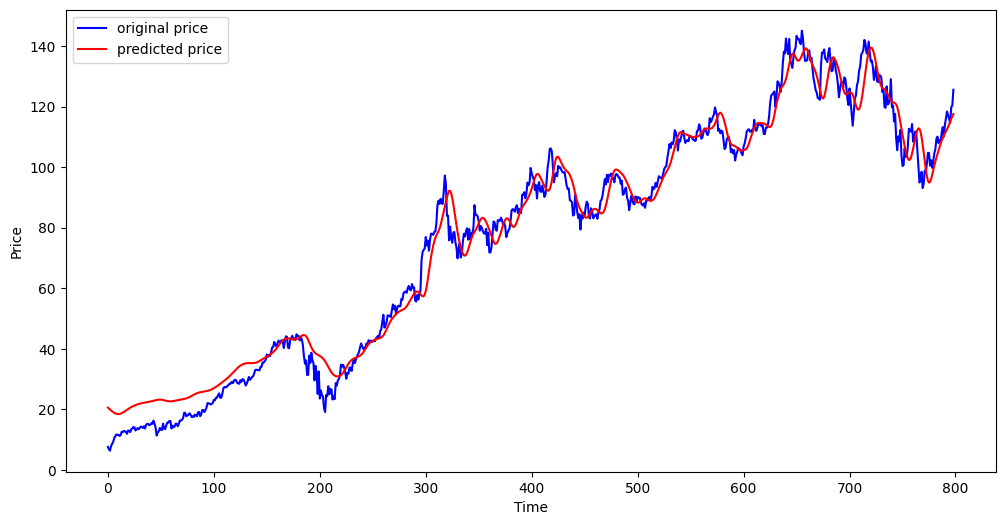

In [76]:
plt.figure(figsize=(12,6))
plt.plot (y_test, 'b', label = 'original price')
plt.plot (y_predicted, 'r', label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()